In [38]:
%pylab inline
import pandas as pd
import numpy as np
from altair import *
import datetime
import analyzeWiggles as aw

Populating the interactive namespace from numpy and matplotlib


/Users/mikihardisty/anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['Text']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Loading data from I15 Southbound

In [39]:
i15S = pd.read_csv('../../I15S_data2.csv')

# Adding columns to dataframe for Weekday and Weekday/Weekend
### Function from analyzeWiggles

In [40]:
i15S['WeekdayWeekend'] = i15S['Timestamp'].apply(lambda x: aw.strTimestampToWeekDayEnd(x))
i15S['WeekdayNumber']=i15S['Timestamp'].apply(lambda x: aw.strTimestampToWeekdayNum(x))

# Wiggles - Occupancy, Flow and Speed
### Mean across all stations - All Days

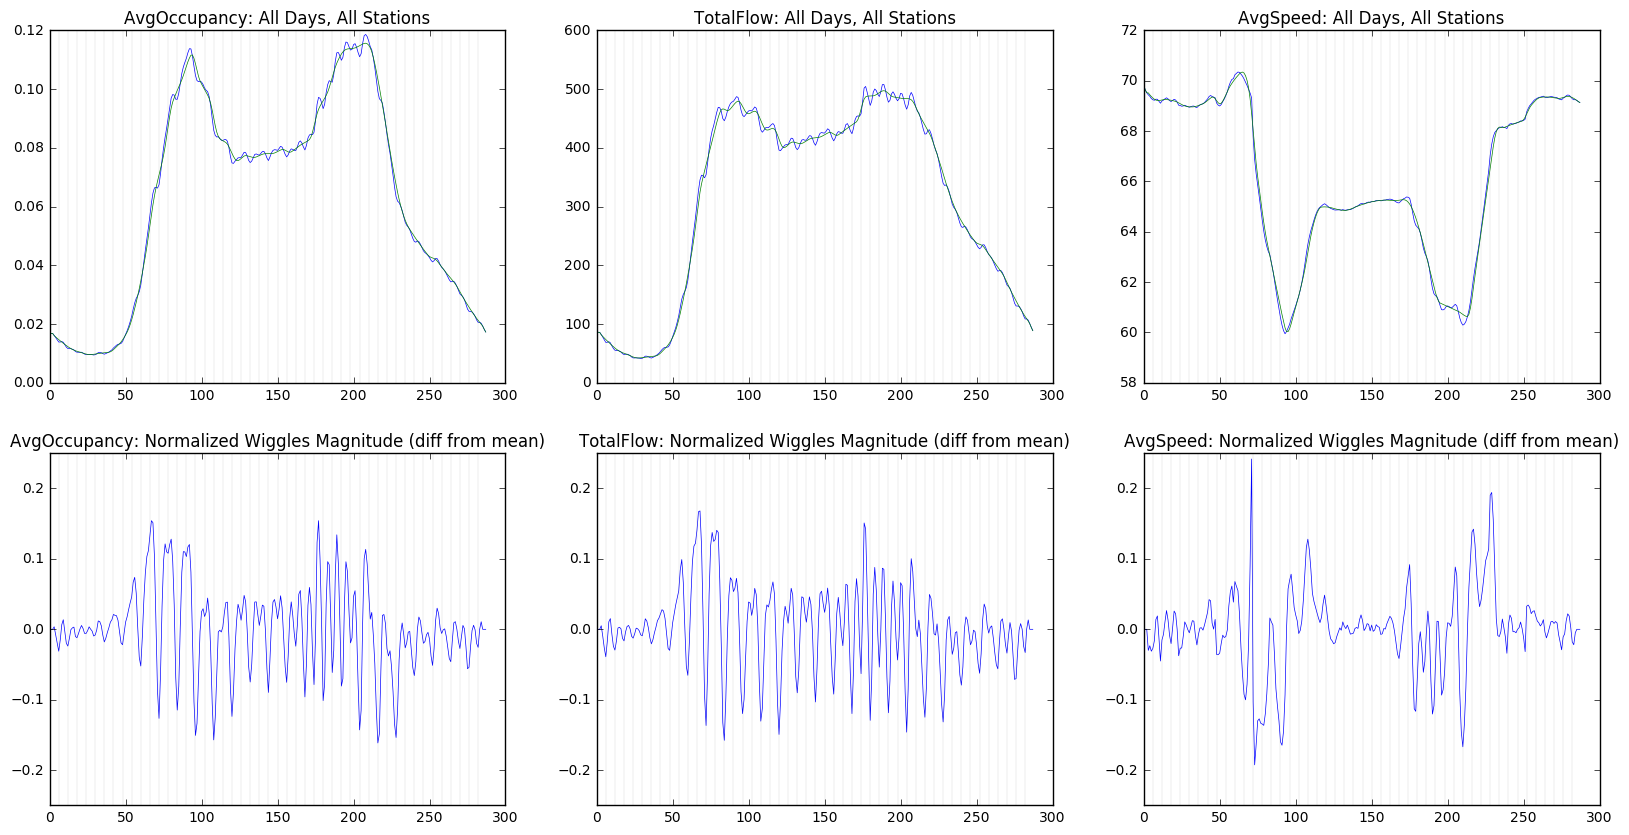

In [41]:
def wigglesOFS(_df, title):
    fig = plt.figure(figsize = (20,10))
    metrics = ['AvgOccupancy', 'TotalFlow', 'AvgSpeed']

    for i,m in enumerate(metrics):
        mv = np.array(_df[['Time',m]].groupby(['Time']).mean()[m])
        vectors = aw.smooth_vector(mv, 'akima', 6)

        ax = fig.add_subplot(2, 3, i+1)
        plt.plot(vectors['meanVector'], linewidth=.5)
        plt.plot(vectors['timelabels'], vectors['smoothedVector'], linewidth=.5)
        for j in range(0,288,12):
            plt.axvline(x=j, linewidth=.1, color='gray')
            plt.axvline(x=j+6, linewidth=.1, color='gray')
        plt.title(str(m)+": "+str(title))

        ax = fig.add_subplot(2, 3, i+4)
        plt.plot(vectors['timelabels'],vectors['diffVector'], color="blue", linewidth=.5)
        plt.title(m +": Normalized Wiggles Magnitude (diff from mean)")
        plt.ylim((-.25,.25))
        for i in range(0,288,12):
            plt.axvline(x=i, linewidth=.1, color='gray')
            plt.axvline(x=i+6, linewidth=.1, color='gray')

    plt.show()
    
wigglesOFS(i15S, "All Days, All Stations")

### Weekdays, All Stations

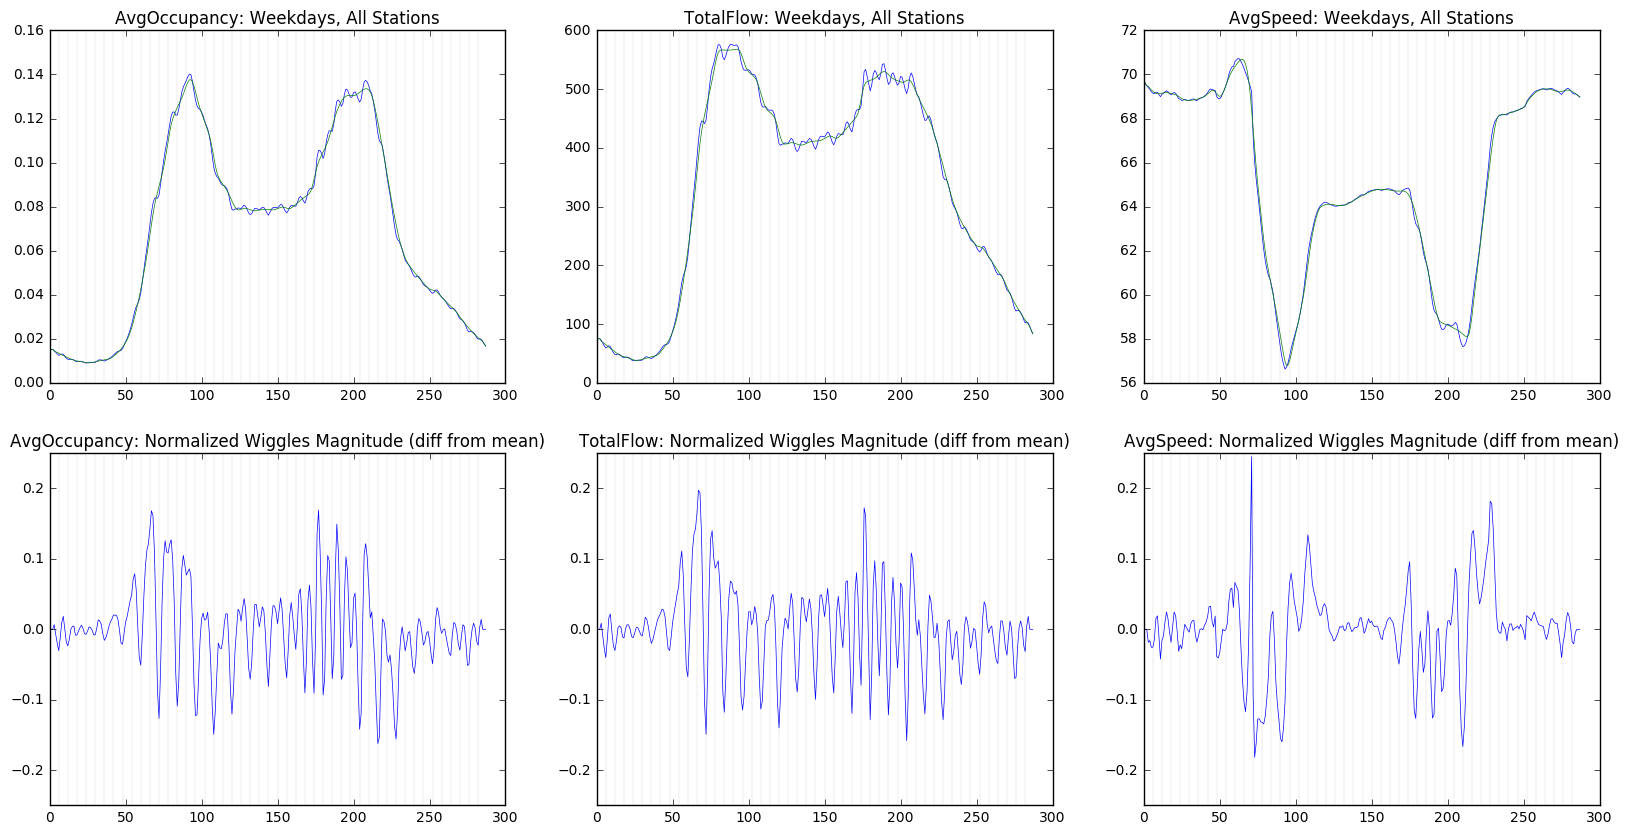

In [42]:
wigglesOFS(i15S[i15S['WeekdayWeekend'] == 'Weekday'], "Weekdays, All Stations")

### Weekends, All Stations

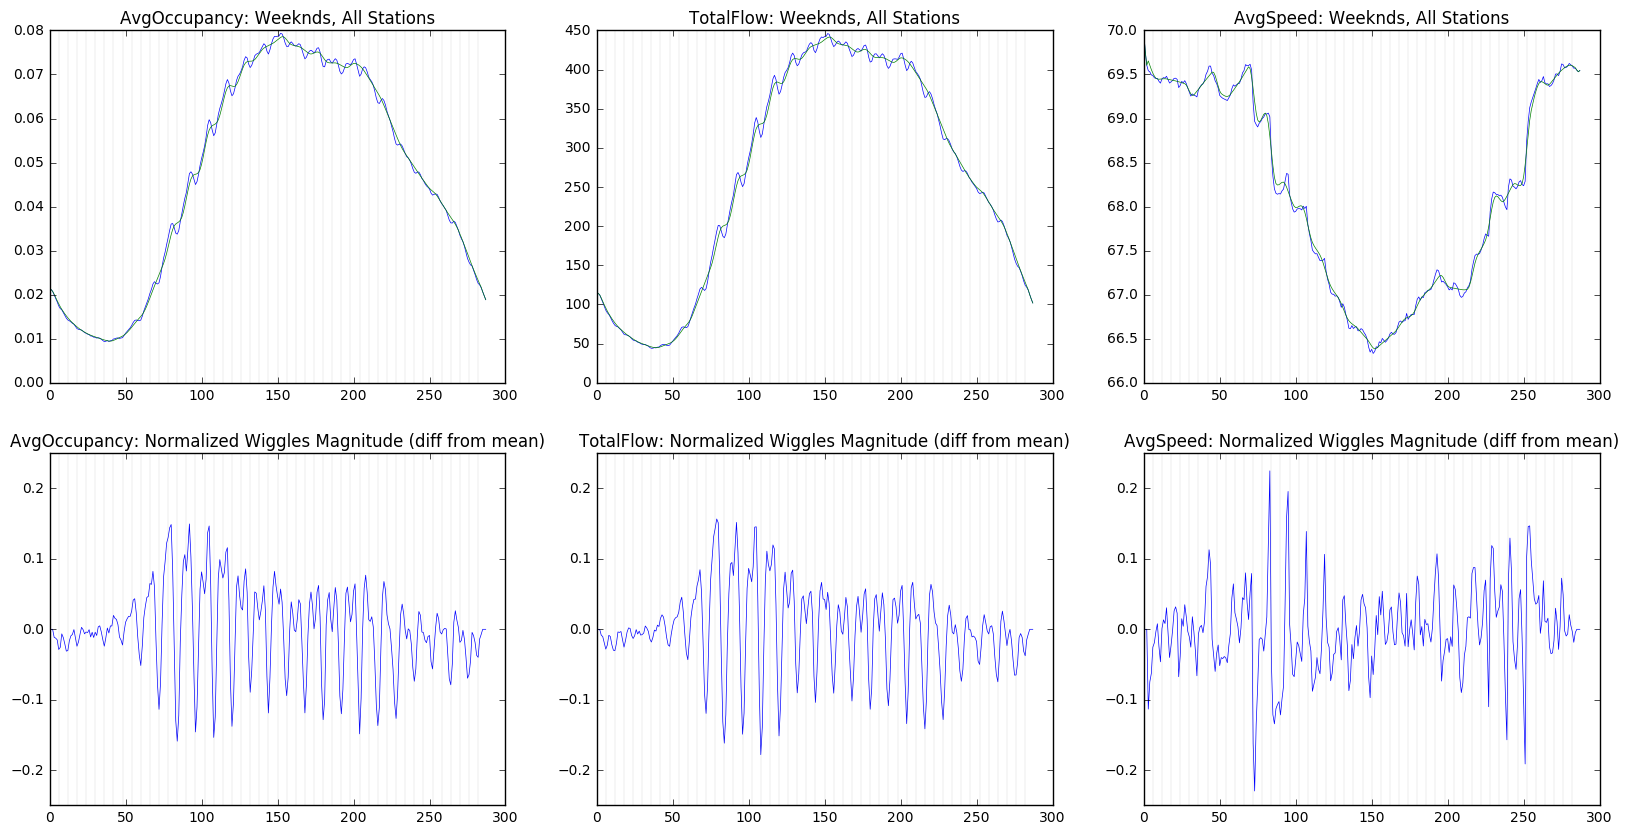

In [43]:
wigglesOFS(i15S[i15S['WeekdayWeekend'] == 'Weekend'], "Weeknds, All Stations")

#  By Station
### Individual Stations

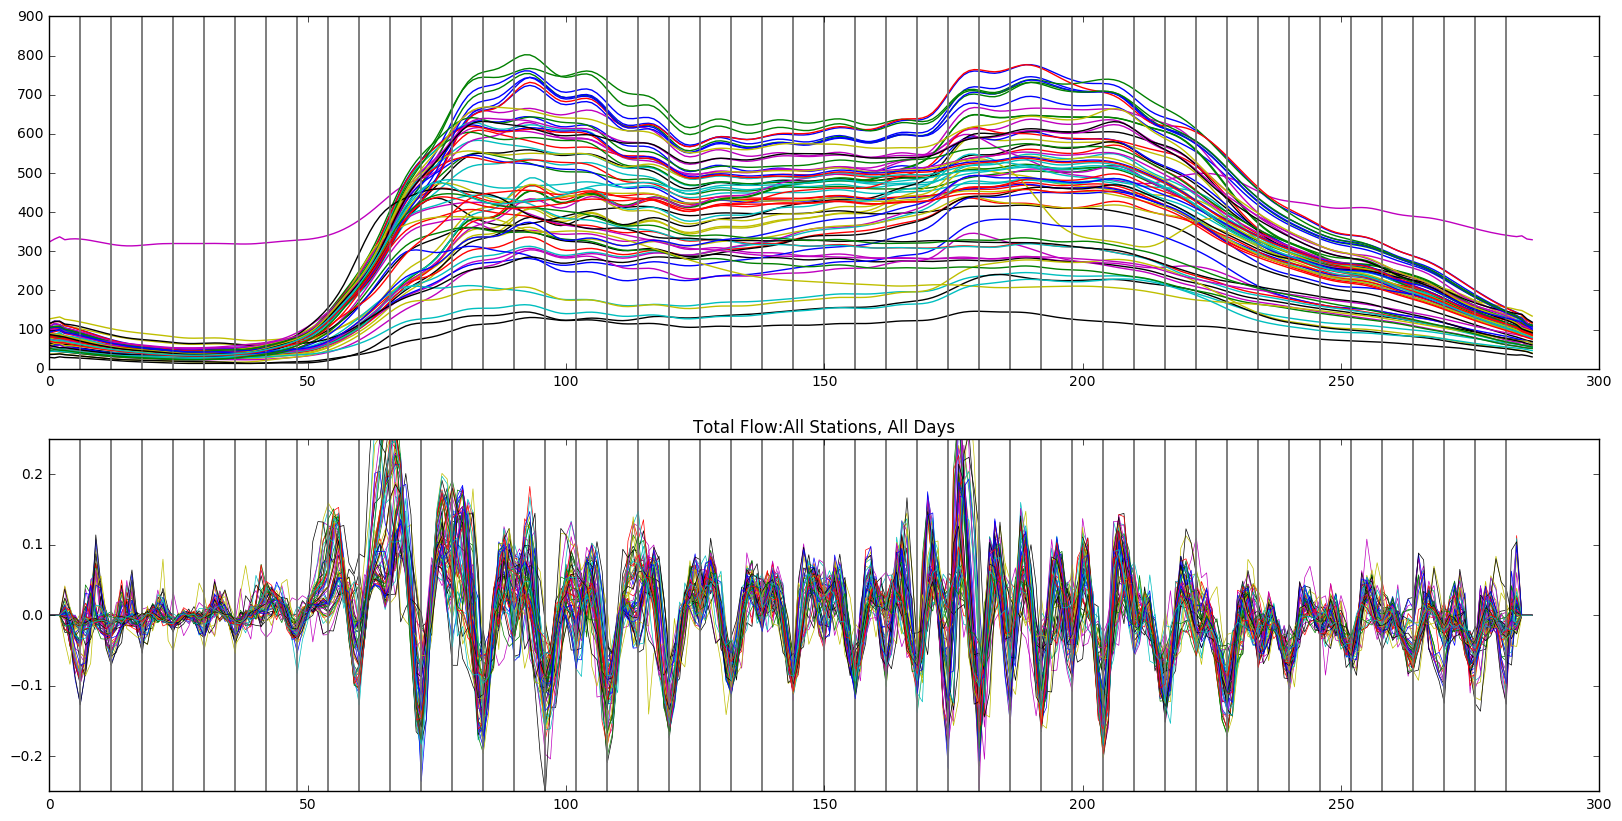

diffVector  meanVector  smoothedVector  timelabels  station  lat_norm  \
0      0.000000   75.323288       75.323288           0  1125879  0.434195   
1      0.000000   71.704110       71.704110           1  1125879  0.434195   
2      0.000000   73.457534       73.457534           2  1125879  0.434195   
3      0.007535   71.446575       70.427854           3  1125879  0.434195   
4      0.001364   67.704110       67.519658           4  1125879  0.434195   
5     -0.013636   62.931507       64.775003           5  1125879  0.434195   
6     -0.017515   59.819178       62.187186           6  1125879  0.434195   
7     -0.003193   59.317808       59.749502           7  1125879  0.434195   
8     -0.011392   55.915068       57.455247           8  1125879  0.434195   
9     -0.008444   54.156164       55.297717           9  1125879  0.434195   
10    -0.006862   52.342466       53.270202          10  1125879  0.434195   
11    -0.008361   50.235616       51.365967          11  1125879  0.434195   
12    -0.011127   48.073973       49.578273          12  1125879  0.434195   
13    -0.002870   47.512329       47.900379          13  1125879  0.434195   
14    -0.011750   44.736986       46.325546          14  1125879  0.434195   
15    -0.001138   44.693151       44.847032          15  1125879  0.434195   
16    -0.003660   42.964384       43.459241          16  1125879  0.434195   
17    -0.007839   41.101370       42.161146          17  1125879  0.434195   
18    -0.004677   40.320548       40.952862          18  1125879  0.434195   
19     0.003068   40.249315       39.834505          19  1125879  0.434195   
20     0.001271   38.978082       38.806191          20  1125879  0.434195   
21    -0.007657   36.832877       37.868037          21  1125879  0.434195   
22    -0.007337   36.030137       37.022057          22  1125879  0.434195   
23    -0.010952   34.797260       36.277871          23  1125879  0.434195   
24    -0.012081   34.013736       35.646998          24  1125879  0.434195   
25     0.000075   35.151099       35.140957          25  1125879  0.434195   
26     0.001976   35.038462       34.771268          26  1125879  0.434195   
27     0.000061   34.557692       34.549451          27  1125879  0.434195   
28     0.001593   34.697802       34.482408          28  1125879  0.434195   
29    -0.005331   33.837912       34.558585          29  1125879  0.434195   
..          ...         ...             ...         ...      ...       ...   
258    0.000435  290.604972      290.489797         258  1108148  0.716034   
259    0.005027  286.850829      285.521129         259  1108148  0.716034   
260    0.026838  287.679558      280.580409         260  1108148  0.716034   
261   -0.004007  274.814917      275.874770         261  1108148  0.716034   
262   -0.034412  262.436464      271.539187         262  1108148  0.716034   
263   -0.055036  252.861878      267.420008         263  1108148  0.716034   
264   -0.053840  249.049724      263.291425         264  1108148  0.716034   
265   -0.035849  249.444751      258.927628         265  1108148  0.716034   
266    0.007987  256.215470      254.102810         266  1108148  0.716034   
267    0.034316  257.668508      248.591160         267  1108148  0.716034   
268    0.014138  245.977901      242.238019         268  1108148  0.716034   
269   -0.007496  233.190608      235.173316         269  1108148  0.716034   
270   -0.023910  221.273481      227.598129         270  1108148  0.716034   
271    0.000613  219.875691      219.713535         271  1108148  0.716034   
272    0.037273  221.580110      211.720614         272  1108148  0.716034   
273    0.004658  205.052486      203.820442         273  1108148  0.716034   
274   -0.044471  184.417127      196.180563         274  1108148  0.716034   
275   -0.068466  170.723757      188.834379         275  1108148  0.716034   
276   -0.064320  164.767956      181.781761         276  1108148  0.716034   
277   -0.026611  167.983425

In [44]:
def plotSmoothedMeansByStation(_df, factor=8, title='', output_file=False):
    fig = plt.figure(figsize = (20,10))

    station_latlong = _df[['Station','Latitude', 'Longitude']]
    lat_max =  station_latlong['Latitude'].max()
    lon_max =  station_latlong['Longitude'].max()
    lat_min =  station_latlong['Latitude'].min()
    lon_min =  station_latlong['Longitude'].min()

    df = {}

    for s in  list(_df['Station'].unique()):
        data = _df[_df['Station'] == s]
        mv = np.array(data[['Time','TotalFlow']].groupby(['Time']).mean()['TotalFlow'])
        vectors = aw.smooth_vector(mv, 'cubic', factor)
        df_temp = pd.DataFrame.from_records(vectors)
        df_temp['station'] = s

        lat = data['Latitude'].values[0]
        lon = data['Longitude'].values[0]
        lat_norm = (lat_max-lat)/(lat_max-lat_min)
        lon_norm = (lon_max-lon)/(lon_max-lon_min)
        df_temp['lat_norm'] = lat_norm
        df_temp['lon_norm'] = lon_norm
        df_temp['lat'] = lat
        df_temp['lon'] = lon
        #print lat, lon
        try:
            df = pd.concat([df_temp, df], axis=0)
        except:
            df = df_temp
        ax = fig.add_subplot(2, 1, 1)
        plt.plot(df_temp['timelabels'], df_temp['smoothedVector'], label=s)
        for i in range(0,288,12):
            plt.axvline(x=i, linewidth=.1, color='gray')
            plt.axvline(x=i+6, linewidth=.1, color='gray')
        
        ax = fig.add_subplot(2, 1, 2)
        plt.plot(df_temp['timelabels'],df_temp['diffVector'], label=s, linewidth=.5)
        plt.title("Normalized Wiggles Magnitude (diff from mean)")
        plt.ylim((-.25,.25))
        for i in range(0,288,12):
            plt.axvline(x=i, linewidth=.1, color='gray')
            plt.axvline(x=i+6, linewidth=.1, color='gray')

    #df
    plt.title('Total Flow:' + str(title))
    #plt.legend()
    plt.show()

    if output_file:
        df.to_csv(output_file)
    return df

df_all_stations = plotSmoothedMeansByStation(i15S, 6, 'All Stations, All Days', 'wiggles.csv')
df_all_stations

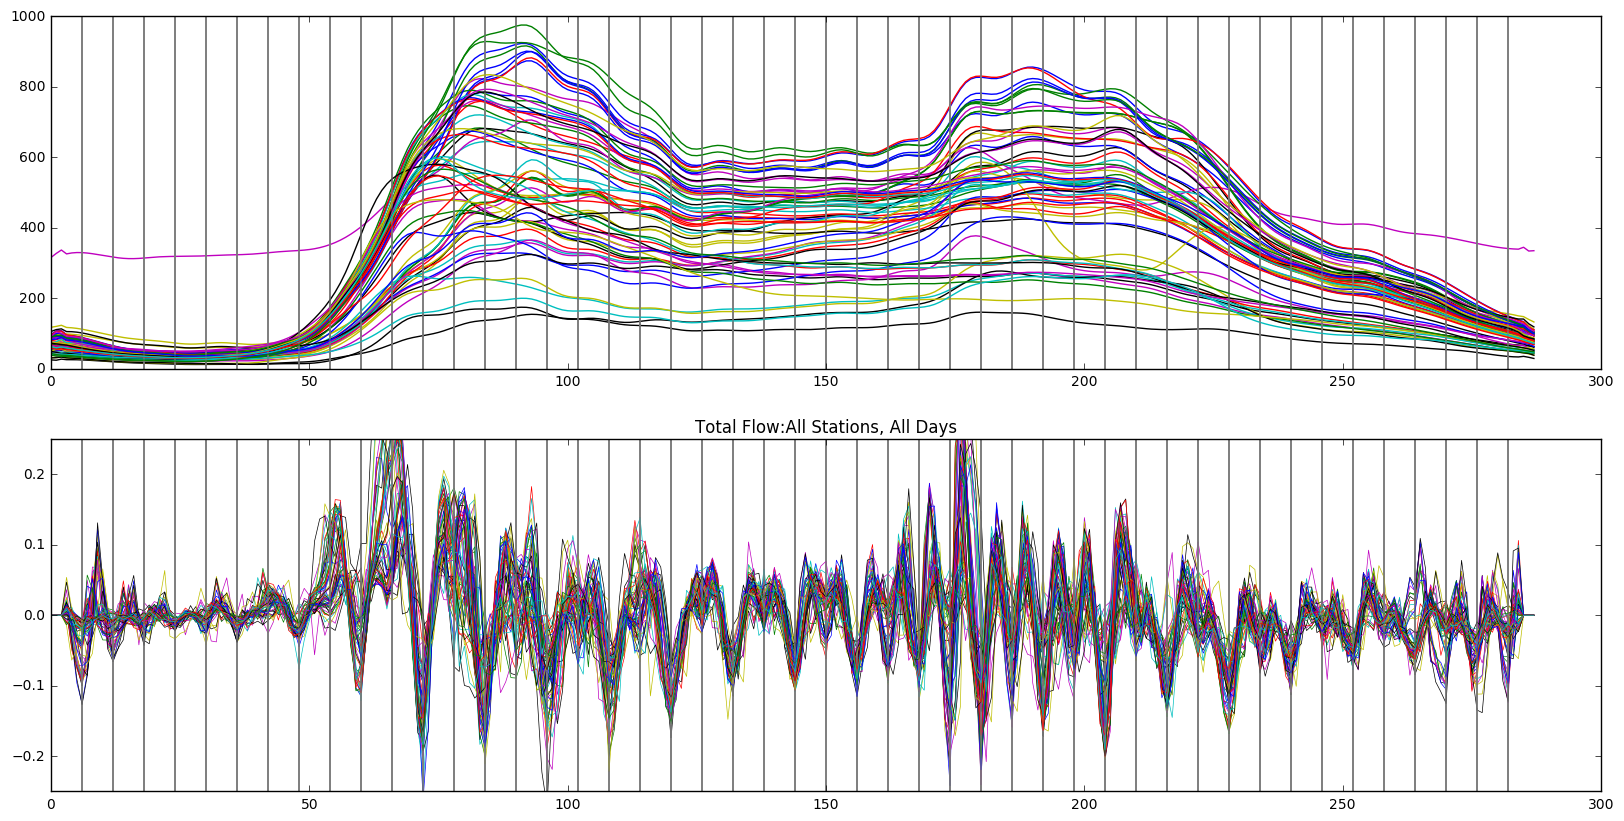

diffVector  meanVector  smoothedVector  timelabels  station  lat_norm  \
0      0.000000   75.323288       75.323288           0  1125879  0.434195   
1      0.000000   71.704110       71.704110           1  1125879  0.434195   
2      0.000000   73.457534       73.457534           2  1125879  0.434195   
3      0.007535   71.446575       70.427854           3  1125879  0.434195   
4      0.001364   67.704110       67.519658           4  1125879  0.434195   
5     -0.013636   62.931507       64.775003           5  1125879  0.434195   
6     -0.017515   59.819178       62.187186           6  1125879  0.434195   
7     -0.003193   59.317808       59.749502           7  1125879  0.434195   
8     -0.011392   55.915068       57.455247           8  1125879  0.434195   
9     -0.008444   54.156164       55.297717           9  1125879  0.434195   
10    -0.006862   52.342466       53.270202          10  1125879  0.434195   
11    -0.008361   50.235616       51.365967          11  1125879  0.434195   
12    -0.011127   48.073973       49.578273          12  1125879  0.434195   
13    -0.002870   47.512329       47.900379          13  1125879  0.434195   
14    -0.011750   44.736986       46.325546          14  1125879  0.434195   
15    -0.001138   44.693151       44.847032          15  1125879  0.434195   
16    -0.003660   42.964384       43.459241          16  1125879  0.434195   
17    -0.007839   41.101370       42.161146          17  1125879  0.434195   
18    -0.004677   40.320548       40.952862          18  1125879  0.434195   
19     0.003068   40.249315       39.834505          19  1125879  0.434195   
20     0.001271   38.978082       38.806191          20  1125879  0.434195   
21    -0.007657   36.832877       37.868037          21  1125879  0.434195   
22    -0.007337   36.030137       37.022057          22  1125879  0.434195   
23    -0.010952   34.797260       36.277871          23  1125879  0.434195   
24    -0.012081   34.013736       35.646998          24  1125879  0.434195   
25     0.000075   35.151099       35.140957          25  1125879  0.434195   
26     0.001976   35.038462       34.771268          26  1125879  0.434195   
27     0.000061   34.557692       34.549451          27  1125879  0.434195   
28     0.001593   34.697802       34.482408          28  1125879  0.434195   
29    -0.005331   33.837912       34.558585          29  1125879  0.434195   
..          ...         ...             ...         ...      ...       ...   
258    0.000435  290.604972      290.489797         258  1108148  0.716034   
259    0.005027  286.850829      285.521129         259  1108148  0.716034   
260    0.026838  287.679558      280.580409         260  1108148  0.716034   
261   -0.004007  274.814917      275.874770         261  1108148  0.716034   
262   -0.034412  262.436464      271.539187         262  1108148  0.716034   
263   -0.055036  252.861878      267.420008         263  1108148  0.716034   
264   -0.053840  249.049724      263.291425         264  1108148  0.716034   
265   -0.035849  249.444751      258.927628         265  1108148  0.716034   
266    0.007987  256.215470      254.102810         266  1108148  0.716034   
267    0.034316  257.668508      248.591160         267  1108148  0.716034   
268    0.014138  245.977901      242.238019         268  1108148  0.716034   
269   -0.007496  233.190608      235.173316         269  1108148  0.716034   
270   -0.023910  221.273481      227.598129         270  1108148  0.716034   
271    0.000613  219.875691      219.713535         271  1108148  0.716034   
272    0.037273  221.580110      211.720614         272  1108148  0.716034   
273    0.004658  205.052486      203.820442         273  1108148  0.716034   
274   -0.044471  184.417127      196.180563         274  1108148  0.716034   
275   -0.068466  170.723757      188.834379         275  1108148  0.716034   
276   -0.064320  164.767956      181.781761         276  1108148  0.716034   
277   -0.026611  167.983425

In [51]:
df_weekday_all_stations = plotSmoothedMeansByStation(i15S[i15S['WeekdayWeekend'] == 'Weekday'], 6, 'All Stations, All Days', 'WiggleWeekdayAllStations.csv')
df_all_stations

### Using Rank1 stations - Station By Station Analysis
https://github.com/mas-dse-c6sander/DSE_Cohort2_Traffic_Capstone/wiki/List-of-Stations-in-rank-order-for-2015

In [45]:
#Rank1 Stations:
rank1 = [1108313, 1108315, 1108317, 1108328, 1108331, 1108339, 1108341, 1108343, 1108351, 1108353, 1108360, 
         1108372, 1108389, 1108401, 1108413, 1108419, 1108421, 1108423, 1108427, 1108429, 1108465, 1108473, 
         1108486, 1108512, 1108523, 1108531, 1108543, 1108547, 1108560, 1108562, 1108564, 1108572, 1108582, 
         1108592, 1108597, 1108623, 1108625, 1108627, 1108649, 1108661, 1108687, 1108693, 1108700, 1108717, 
         1108728, 1108739, 1108741, 1108743, 1108745, 1108760, 1111514, 1111526, 1111531, 1111535, 1111557, 
         1111569, 1111570, 1111575, 1112989, 1113126, 1113138, 1113147, 1113292, 1113318, 1113364, 1113720, 
         1113740, 1115240, 1115450, 1115486, 1115537, 1115612, 1115616, 1115624, 1115649, 1115656, 1115663, 
         1115721, 1115739, 1115771, 1115779, 1115787, 1115811, 1115820, 1115838, 1115897, 1115921, 1115929, 
         1115937, 1115946, 1116092, 1116098, 1116119, 1116133, 1116139, 1116145, 1116158, 1116318, 1117836, 
         1117850, 1117899, 1118013, 1118170, 1118260, 1118521, 1118529, 1118707, 1118796, 1118957, 1119528, 
         1119645, 1119653, 1119679, 1119683, 1119689, 1119694, 1119699, 1119749, 1119762, 1119842, 1119850, 
         1119865, 1119871, 1119890, 1119897, 1119934, 1119947, 1119954, 1119960, 1119966, 1119972, 1119978, 
         1119984, 1119990, 1119997, 1120356, 1120362, 1121037, 1121038, 1121105, 1121112, 1121118, 1122394, 
         1122469, 1122479, 1122507, 1122552, 1122560, 1122575, 1122594, 1122645, 1122646, 1123030, 1123031, 
         1123078, 1123081, 1125314, 1125348, 1125353, 1125689, 1125836, 1125865, 1125872, 1125879]

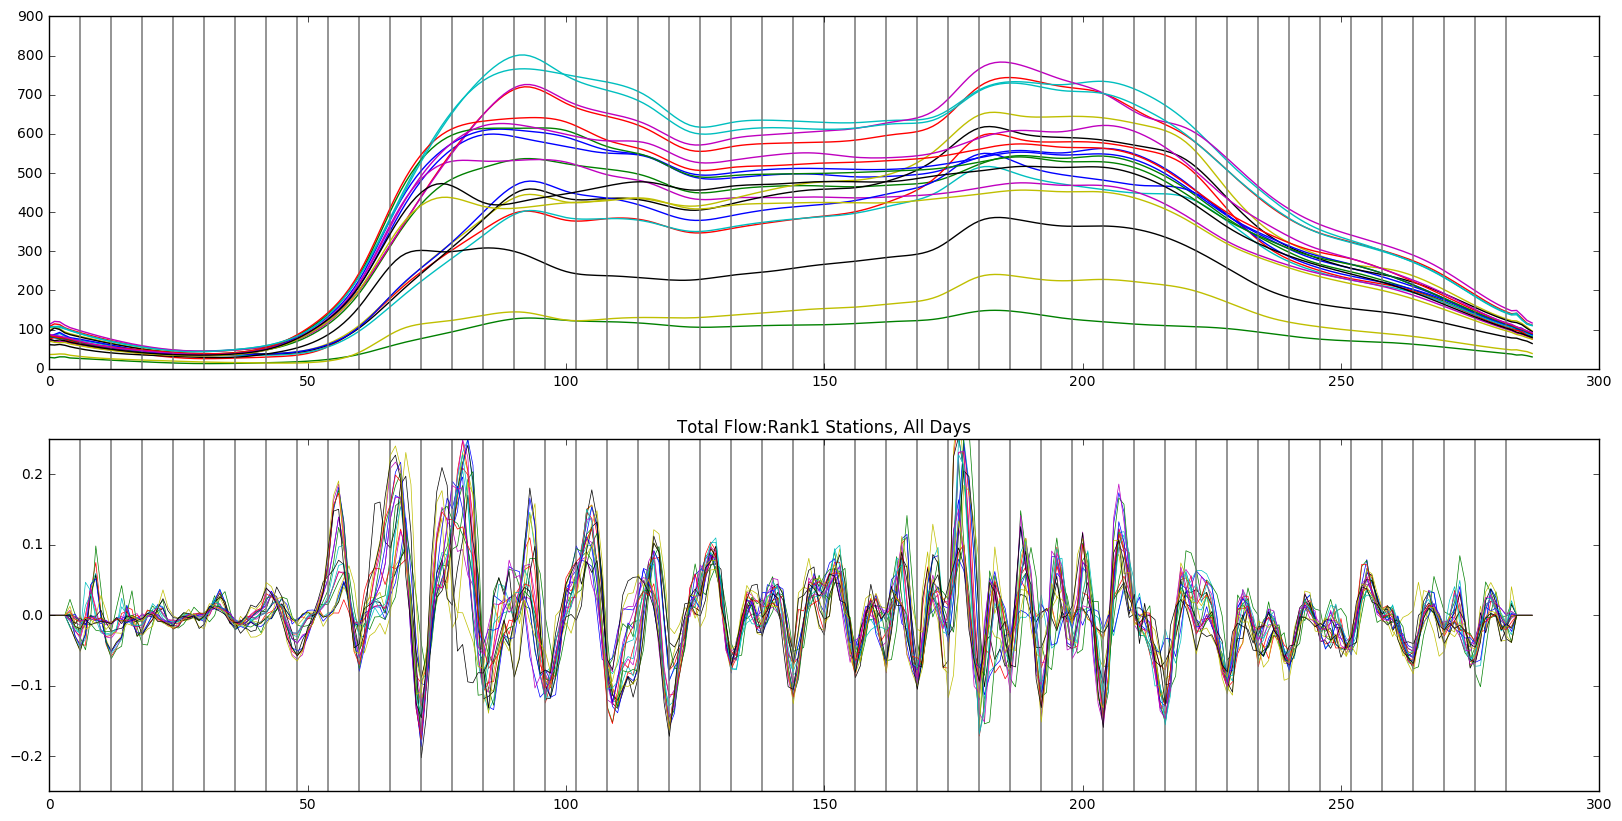

In [46]:
df_rank1_alldays = plotSmoothedMeansByStation(i15S[i15S['Station'].isin(rank1)], 8, 'Rank1 Stations, All Days')

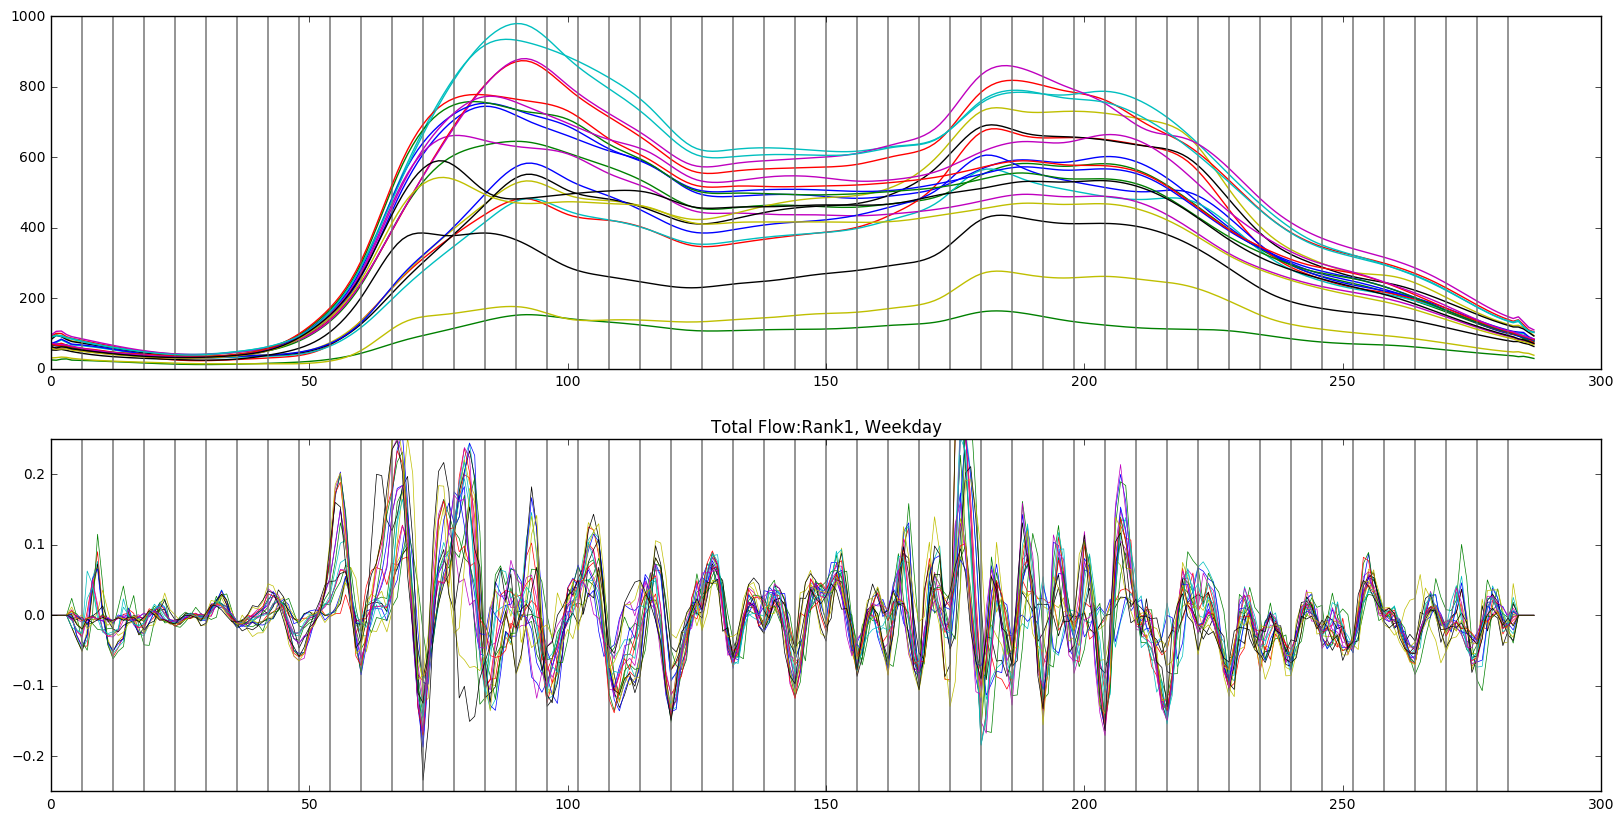

In [47]:
df_weekday_rank1 = i15S[i15S['Station'].isin(rank1)]
df_weekday_rank1 = df_weekday_rank1[df_weekday_rank1['WeekdayWeekend'] == 'Weekday']
df_weekday_rank1 = plotSmoothedMeansByStation(df_weekday_rank1[df_weekday_rank1['Station'].isin(rank1)], 8, 'Rank1, Weekday')


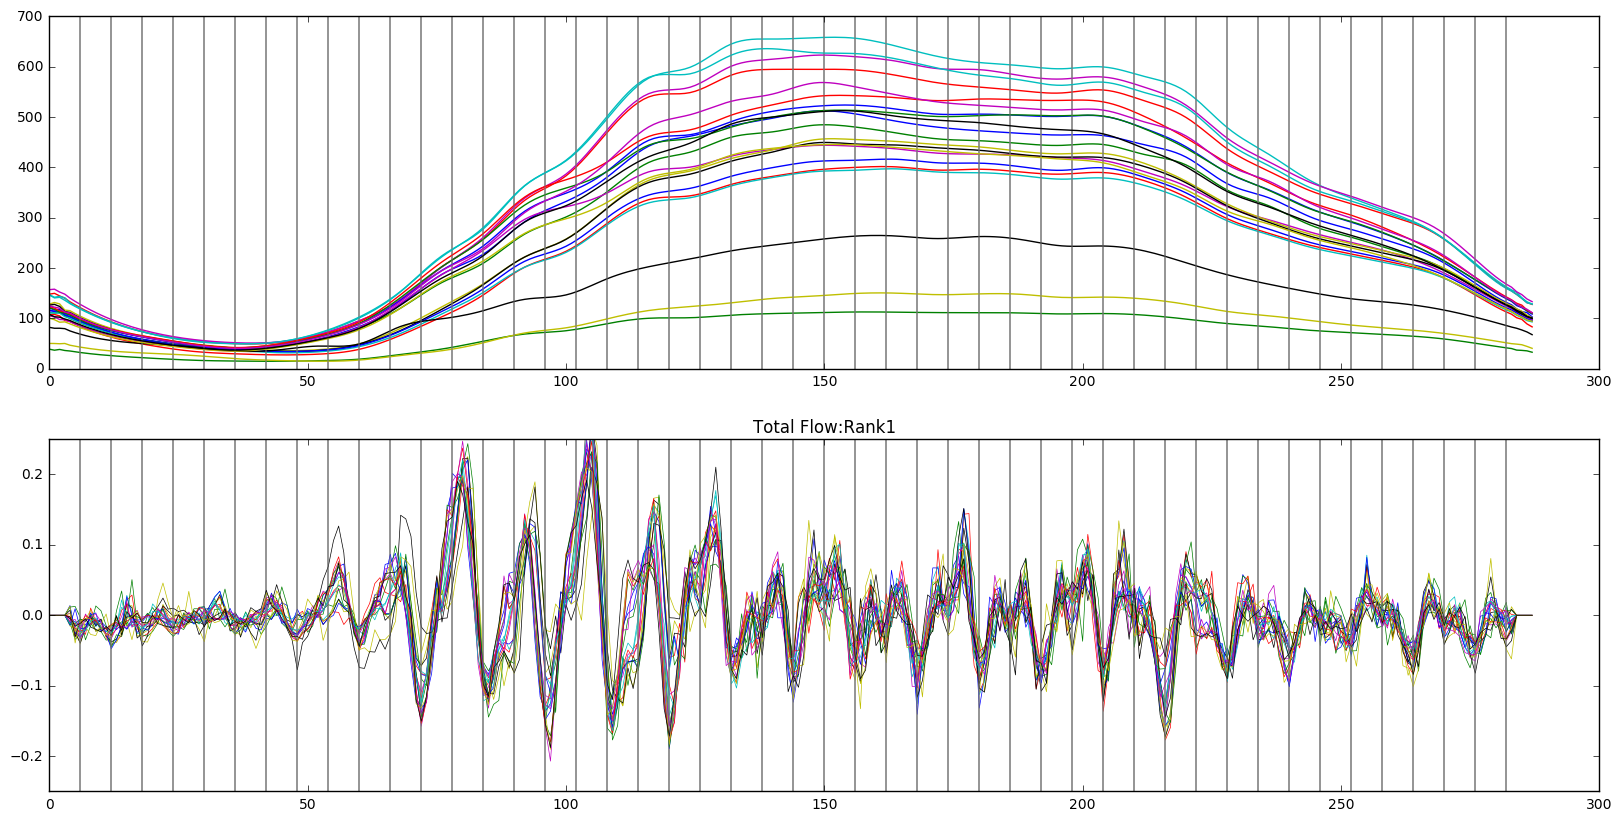

In [48]:
df_weekend_rank1 = i15S[i15S['Station'].isin(rank1)]
df_weekend_rank1 = df_weekend_rank1[df_weekend_rank1['WeekdayWeekend'] == 'Weekend']
df_weekend_rank1 = plotSmoothedMeansByStation(df_weekend_rank1[df_weekend_rank1['Station'].isin(rank1)], 8, 'Rank1')


# <a href="https://public.tableau.com/shared/SS7X3DBZH?:display_count=yes">Click here for Interactive Wiggles</a>
